<a href="https://colab.research.google.com/github/adityadj98/-Web-Scraping-Text-Analysis-using-Python-for-Beginner/blob/main/coding_fft.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# New Section

In [2]:
pip install pydub

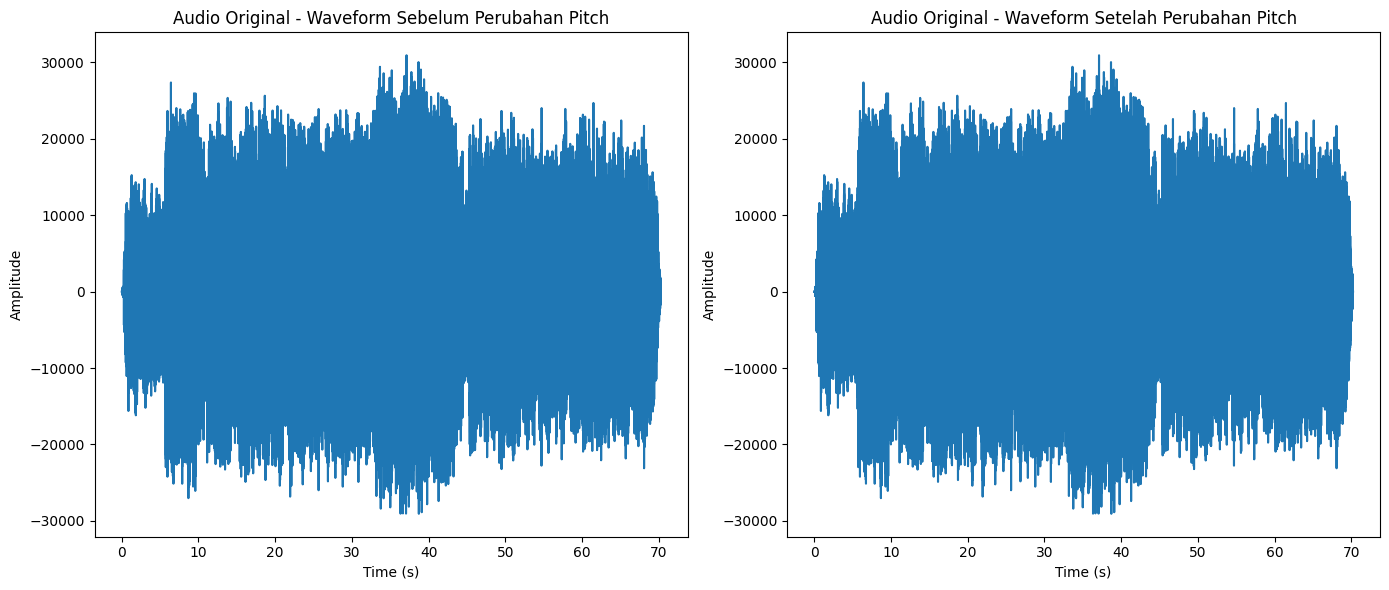

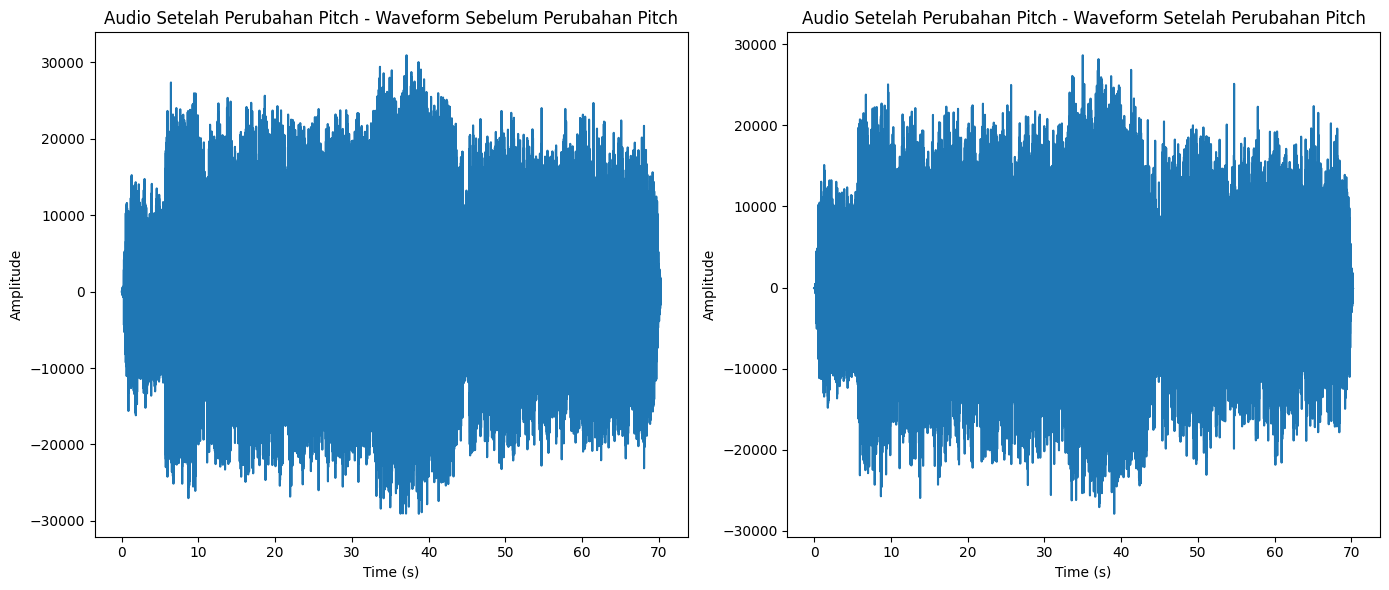

File berhasil diekspor sebagai output.mp3


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import soundfile as sf
from pydub import AudioSegment

# Fungsi untuk mengubah pitch menggunakan FFT
def change_pitch(signal, pitch_factor):
    # Transformasi ke domain frekuensi menggunakan FFT
    frequencies = np.fft.fft(signal)

    # Shift frekuensi berdasarkan faktor pitch yang diberikan
    length = len(frequencies)
    shifted_frequencies = np.zeros_like(frequencies)

    # Menggeser frekuensi
    if pitch_factor < 0:
        shifted_frequencies[:length + pitch_factor] = frequencies[-pitch_factor:]
    else:
        shifted_frequencies[pitch_factor:] = frequencies[:-pitch_factor]

    # Transformasi kembali ke domain waktu
    time_domain_signal = np.real(np.fft.ifft(shifted_frequencies))
    return time_domain_signal

# Fungsi untuk menampilkan grafik
def plot_signals(original_signal, modified_signal, sr, title):
    # Waktu untuk sumbu x
    time = np.arange(len(original_signal)) / sr

    # Mempersiapkan DataFrame untuk visualisasi
    original_df = pd.DataFrame({'Time': time, 'Amplitude': original_signal})
    modified_df = pd.DataFrame({'Time': time, 'Amplitude': modified_signal})

    # Set up the figure and axes
    plt.figure(figsize=(14, 6))

    # Grafik untuk sinyal asli
    plt.subplot(1, 2, 1)
    sns.lineplot(data=original_df, x='Time', y='Amplitude')
    plt.title(f'{title} - Waveform Sebelum Perubahan Pitch')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Grafik untuk sinyal yang diubah
    plt.subplot(1, 2, 2)
    sns.lineplot(data=modified_df, x='Time', y='Amplitude')
    plt.title(f'{title} - Waveform Setelah Perubahan Pitch')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Fungsi utama untuk mengubah pitch file mp3
def process_audio(input_file, output_file, pitch_factor):
    # Load audio menggunakan pydub
    audio = AudioSegment.from_file(input_file)

    # Konversi audio ke mono jika stereo
    audio = audio.set_channels(1)

    # Konversi ke data numpy
    samples = np.array(audio.get_array_of_samples(), dtype=np.float32)

    # Tampilkan grafik sebelum perubahan
    plot_signals(samples, samples, audio.frame_rate, "Audio Original")

    # Ubah pitch dengan metode FFT
    processed_samples = change_pitch(samples, pitch_factor)

    # Tampilkan grafik setelah perubahan
    plot_signals(samples, processed_samples, audio.frame_rate, "Audio Setelah Perubahan Pitch")

    # Simpan hasil dalam format wav sementara
    temp_wav = 'temp_output.wav'
    sf.write(temp_wav, processed_samples, audio.frame_rate)

    # Konversi WAV ke MP3 menggunakan pydub
    temp_audio = AudioSegment.from_wav(temp_wav)
    temp_audio.export(output_file, format="mp3")
    print(f"File berhasil diekspor sebagai {output_file}")

# Eksekusi
input_file = 'lagu.mp3'  # Ganti dengan path file lagu Anda
output_file = 'output.mp3'

# Faktor pitch < 0 untuk menurunkan pitch (misalnya -4 untuk 4 semitone)
pitch_factor = -4000  # Menggeser sekitar 4000 samples (atur sesuai kebutuhan)

process_audio(input_file, output_file, pitch_factor)


In [14]:
files.download('outputjadi.mp3')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>